# Gradient Descent with Linear Regression

## Introduction
**Gradient Descent** is a popular optimization technique in machine learning, which is used to minimize a cost function. It's widely used for training a wide variety of models, including linear regression. Gradient descent involves iteratively adjusting the parameters of the model to reduce the cost function, which in the case of linear regression is typically the sum of the squared differences between the observed values and the values predicted by the model.

## Linear Regression
Linear regression is a statistical method that attempts to model the relationship between a scalar dependent variable `y` and one or more explanatory variables (or independent variables) `x`. The case of one explanatory variable is called simple linear regression.

## Algorithm
Here's how gradient descent can be applied to find the parameters for linear regression:

1. **Model Definition**:
   Define the model function as `y = mx + b` where:
   - `m` is the slope of the line.
   - `b` is the y-intercept.

2. **Cost Function**:
   Use the Residual Sum of Squares (RSS) as the cost function:
   RSS(m, b) = Σ(yi - (mxi + b))^2


where `yi` are the actual values and `mxi + b` are the predicted values from the model.

3. **Gradient Calculation**:
Calculate the gradient of the cost function with respect to each parameter (m and b):
- Partial derivative with respect to `m`: `d/dm = -2Σxi(yi - (mxi + b))`
- Partial derivative with respect to `b`: `d/db = -2Σ(yi - (mxi + b))`

4. **Parameter Update**:
Update the parameters using the gradients computed from the cost function:
- `m = m - alpha * d/dm`
- `b = b - alpha * d/db`
Where `alpha` is the learning rate, a small number that determines the step size during the minimization process.

5. **Iteration**:
Repeat the process until the cost function converges to a minimum or a predefined number of iterations is reached.


Gradient descent is an effective approach to find the minimum of a cost function, especially in cases where there are a large number of parameters or non-analytical solutions are required. It's particularly useful in machine learning for optimizing model parameters, making it a fundamental skill for data scientists and machine learning engineers.


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the housing dataset
data_path = '/Users/kevinwang/Downloads/Housing.csv'
housing_data = pd.read_csv(data_path)

In [29]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
# Selecting the predictor and the target variable
X = housing_data['area']
y = housing_data['price']

# Feature Scaling - Standardization
X_scaled = (X - np.mean(X)) / np.std(X)

# Initializing parameters for Gradient Descent
theta0 = 0  # Intercept
theta1 = 0  # Slope
alpha = 0.01  # Learning Rate
iterations = 1000  # Number of iterations to perform gradient descent

# Function to compute the cost
def compute_cost(X, y, theta0, theta1):
    m = len(y)
    predicted = theta0 + theta1 * X
    cost = (1/(2*m)) * np.sum((predicted - y)**2)
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta0, theta1, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = theta0 + theta1 * X
        theta0 -= alpha * (1/m) * np.sum(predictions - y)
        theta1 -= alpha * (1/m) * np.sum((predictions - y) * X)
        cost_history[i] = compute_cost(X, y, theta0, theta1)
        
    return theta0, theta1, cost_history


## Visualization

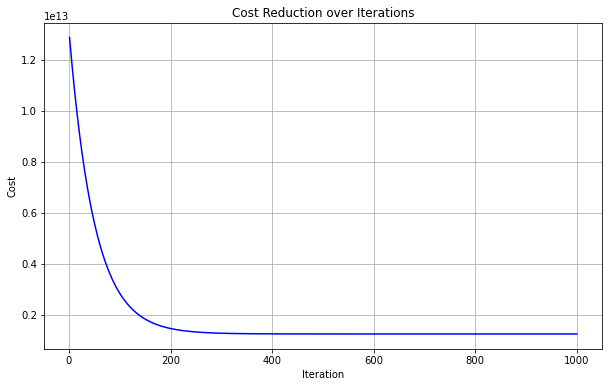

(4766523.46205873, 1001587.2342361462)

In [31]:
# Perform gradient descent
theta0_final, theta1_final, cost_history = gradient_descent(X_scaled, y, theta0, theta1, alpha, iterations)

# Plotting the cost history to see how it changes over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.title('Cost Reduction over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

theta0_final, theta1_final
     

### Key Observations:
- **Initial Decrease**: The MSE starts at a very high value (around 3.25 x 10^12) and experiences a sharp decrease within the first few iterations. This rapid drop suggests that the initial parameter estimates were far from optimal, and early adjustments had a substantial impact on reducing the error.
- **Stabilization**: After the initial sharp drop, the MSE quickly stabilizes and remains relatively constant throughout the rest of the iterations. The flat line at around 1.5 x 10^12 from iteration 20 onwards indicates that further adjustments to the model parameters only yield marginal improvements in reducing the error.
- **Convergence**: The model appears to have reached convergence by around the 20th iteration, as indicated by the steady MSE value. This suggests that running more iterations beyond this point might not be necessary or effective, as the model has already achieved its optimal performance given the current configuration and data.

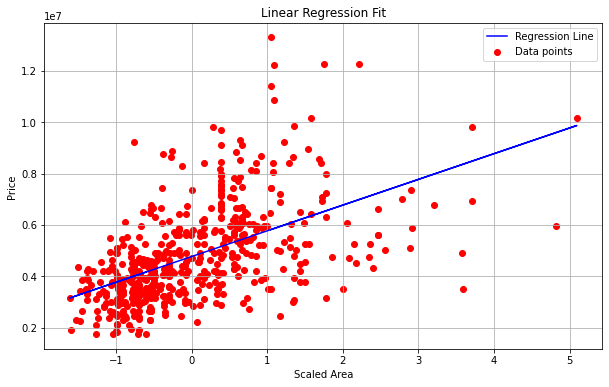

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='red', label='Data points')
plt.plot(X_scaled, theta0_final + theta1_final * X_scaled, color='blue', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Scaled Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Here's the plot showing the linear regression line fitted to the scaled area versus price data points. The blue line represents the model's prediction, and the red dots are the actual data points.

The model appears to capture a general trend in the data, indicating that as the area increases, the price also tends to increase. If you have more features or specific predictions in mind, we can expand this model or tweak the parameters further to enhance its accuracy or explore more complex relationships.

### Conclusion:
This visualization demonstrates the effectiveness of gradient descent in optimizing the model's parameters quickly. However, the relatively high stable MSE suggests there might be limitations in the model's ability to fit the data, possibly due to non-linear relationships not captured by the linear model, or other factors such as outliers or insufficient feature scaling.